# Forecasting con diferentes modelos

In [49]:
from __future__ import annotations

from typing import Tuple

import pandas as pd

# Lectura de datos

In [50]:
sales = pd.read_csv("sales.csv")

In [53]:
sales.index = pd.to_datetime(sales["Week"], unit="W")
sales.index.name = "Week Date"

In [54]:
sales

,Week,Product,Sales,Promotion,Holiday
Week Date,,,,,
1970-01-08,1,Product_1,152.0,1,0
1970-01-15,2,Product_1,485.0,0,0
1970-01-22,3,Product_1,398.0,0,0
1970-01-29,4,Product_1,320.0,0,0
1970-02-05,5,Product_1,156.0,0,0
1970-02-12,6,Product_1,121.0,1,0
1970-02-19,7,Product_1,238.0,0,0
1970-02-26,8,Product_1,70.0,1,0
1970-03-05,9,Product_1,152.0,1,0


In [52]:
sales.shape

(30, 5)

# SARIMAX

## División de datos

In [55]:
def split_sales_sarimax(
    sales: pd.DataFrame,
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    sales_transformed = sales.copy()

    weeks_to_forecast = sales_transformed[sales_transformed["Week"] > 28]
    train = sales_transformed[sales_transformed["Week"] <= 22]
    test = sales_transformed[
        (sales_transformed["Week"] > 22) & (sales_transformed["Week"] <= 28)
    ]

    train = train.drop(columns=["Week", "Product"])
    test = test.drop(columns=["Week", "Product"])
    weeks_to_forecast = weeks_to_forecast.drop(columns=["Week", "Product"])

    return train, test, weeks_to_forecast

In [56]:
train_sarimax, test_sarimax, weeks_to_forecast_sarimax = split_sales_sarimax(sales)

In [57]:
display(train_sarimax)
display(test_sarimax)
display(weeks_to_forecast_sarimax)

,Sales,Promotion,Holiday
Week Date,,,
1970-01-08,152.0,1,0
1970-01-15,485.0,0,0
1970-01-22,398.0,0,0
1970-01-29,320.0,0,0
1970-02-05,156.0,0,0
1970-02-12,121.0,1,0
1970-02-19,238.0,0,0
1970-02-26,70.0,1,0
1970-03-05,152.0,1,0


,Sales,Promotion,Holiday
Week Date,,,
1970-06-11,463.0,0,0
1970-06-18,343.0,0,0
1970-06-25,435.0,1,0
1970-07-02,241.0,0,0
1970-07-09,493.0,1,1
1970-07-16,326.0,0,0


,Sales,Promotion,Holiday
Week Date,,,
1970-07-23,NaN,1,0
1970-07-30,NaN,0,1


## Modelo SARIMAX

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [95]:
sarimax_model = SARIMAX(
    train_sarimax["Sales"],
    exog=train_sarimax[["Promotion", "Holiday"]],
    order=(2, 1, 2),
    seasonal_order=(0, 0, 0, 4),
)
sarimax_results = sarimax_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.25120D+00    |proj g|=  5.86290D-01

At iterate    5    f=  5.87308D+00    |proj g|=  4.12790D-02

At iterate   10    f=  5.86427D+00    |proj g|=  4.79474D-03

At iterate   15    f=  5.85552D+00    |proj g|=  5.13710D-04

At iterate   20    f=  5.85265D+00    |proj g|=  3.46012D-03

At iterate   25    f=  5.85006D+00    |proj g|=  6.95314D-05

At iterate   30    f=  5.84998D+00    |proj g|=  8.32196D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/home/carroyo/other_files/mercadolibre-test/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
/home/carroyo/other_files/mercadolibre-test/.venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-THU will be used.
  self._init_dates(dates, freq)
/home/carroyo/other_files/mercadolibre-test/.venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


In [96]:
sarimax_forecast = sarimax_results.forecast(
    steps=len(test_sarimax), exog=test_sarimax[["Promotion", "Holiday"]]
)

In [97]:
sarimax_forecast

1970-06-11    335.709003
1970-06-18    319.081696
1970-06-25    210.843323
1970-07-02    312.994459
1970-07-09     71.328840
1970-07-16    312.493202
Freq: W-THU, Name: predicted_mean, dtype: float64

# Exploración rápida

In [77]:
import matplotlib.pyplot as plt

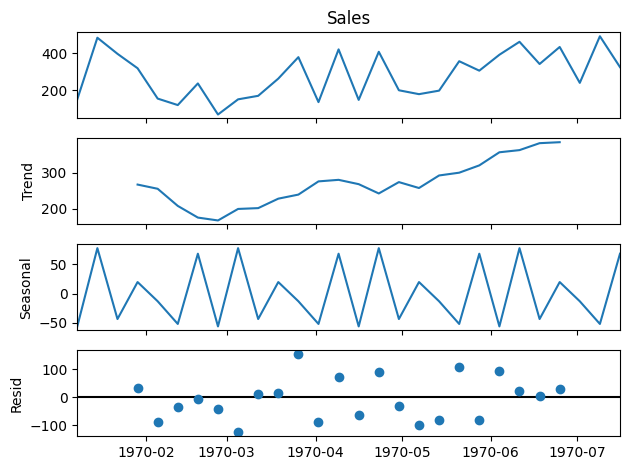

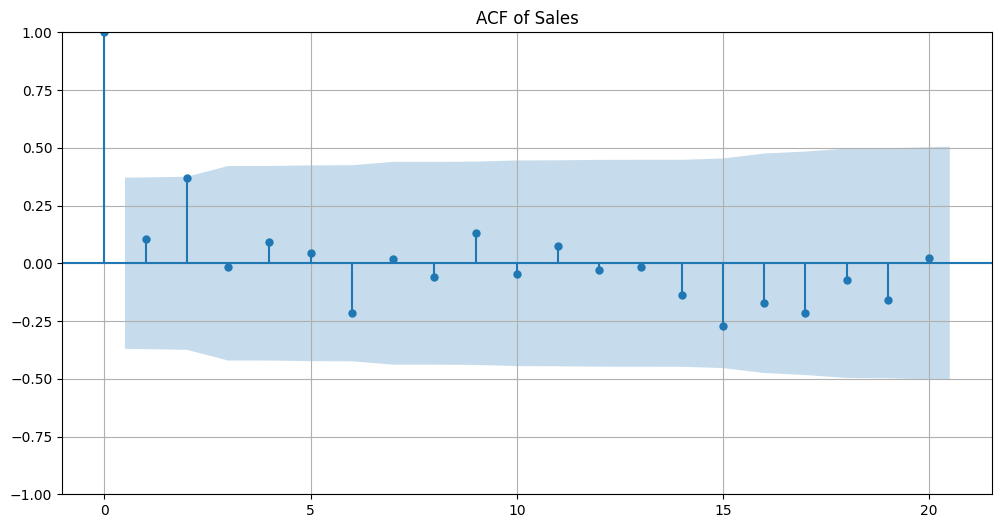

(np.float64(0.5459035079055705),
 'x must have 2 complete cycles requires 104 observations. x only has 28 observation(s)')

In [82]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition with a weekly period (assuming 7-day weekly cycle)
try:
    decomposition = seasonal_decompose(
        sales["Sales"].dropna(), model="additive", period=7
    )
    decomposition.plot()
    plt.show()
except ValueError as e:
    decomposition_result = str(e)

# Perform ACF analysis to check for seasonal patterns
plt.figure(figsize=(12, 6))
plot_acf(sales["Sales"].dropna(), lags=20, ax=plt.gca())
plt.title("ACF of Sales")
plt.grid()
plt.show()

# Group by weekly cycles and test for seasonality using ANOVA
import scipy.stats as stats

# Group by week number in a 7-week cycle
sales["Week_Number"] = (sales["Week"] - 1) % 7 + 1
anova_result = stats.f_oneway(
    *[sales[sales["Week_Number"] == i]["Sales"].dropna() for i in range(1, 8)]
)

(
    anova_result.pvalue,
    decomposition_result if "decomposition_result" in locals() else None,
)


# División de datos para los demás modelos

In [58]:
def split_sales_models(
    sales: pd.DataFrame,
) -> Tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    sales_transformed = sales.copy()

    sales_transformed["Sales Lag_1"] = sales_transformed["Sales"].shift(1)
    sales_transformed["Sales Lag_2"] = sales_transformed["Sales"].shift(2)
    sales_transformed["Sales Lag_4"] = sales_transformed["Sales"].shift(4)
    sales_transformed["Rolling_Mean_3"] = (
        sales_transformed["Sales"].rolling(window=3).mean()
    )
    sales_transformed["Rolling_Std_3"] = (
        sales_transformed["Sales"].rolling(window=3).std()
    )

    weeks_to_forecast = sales_transformed[sales_transformed["Week"] > 28]
    train = sales_transformed[sales_transformed["Week"] <= 22]
    test = sales_transformed[
        (sales_transformed["Week"] > 22) & (sales_transformed["Week"] <= 28)
    ]

    # Keep "Week" to capture any linear trend
    train = train.drop(columns=["Product"]).dropna()
    test = test.drop(columns=["Product"])
    weeks_to_forecast = weeks_to_forecast.drop(columns=["Product"])

    return train, test, weeks_to_forecast

In [59]:
train_models, test_models, weeks_to_forecast_models = split_sales_models(sales)

In [60]:
display(train_models)
display(test_models)
display(weeks_to_forecast_models)

,Week,Sales,Promotion,Holiday,Sales Lag_1,Sales Lag_2,Sales Lag_4,Rolling_Mean_3,Rolling_Std_3
Week Date,,,,,,,,,
1970-02-05,5,156.0,0,0,320.0,398.0,152.0,291.333333,123.520579
1970-02-12,6,121.0,1,0,156.0,320.0,485.0,199.000000,106.240294
1970-02-19,7,238.0,0,0,121.0,156.0,398.0,171.666667,60.052755
1970-02-26,8,70.0,1,0,238.0,121.0,320.0,143.000000,86.133617
1970-03-05,9,152.0,1,0,70.0,238.0,156.0,153.333333,84.007936
1970-03-12,10,171.0,0,0,152.0,70.0,121.0,131.000000,53.674948
1970-03-19,11,264.0,0,0,171.0,152.0,238.0,195.666667,59.936077
1970-03-26,12,380.0,1,0,264.0,171.0,70.0,271.666667,104.710713
1970-04-02,13,137.0,1,1,380.0,264.0,152.0,260.333333,121.541488


,Week,Sales,Promotion,Holiday,Sales Lag_1,Sales Lag_2,Sales Lag_4,Rolling_Mean_3,Rolling_Std_3
Week Date,,,,,,,,,
1970-06-11,23,463.0,0,0,393.0,307.0,199.0,387.666667,78.136632
1970-06-18,24,343.0,0,0,463.0,393.0,358.0,399.666667,60.277138
1970-06-25,25,435.0,1,0,343.0,463.0,307.0,413.666667,62.780039
1970-07-02,26,241.0,0,0,435.0,343.0,393.0,339.666667,97.042946
1970-07-09,27,493.0,1,1,241.0,435.0,463.0,389.666667,131.974745
1970-07-16,28,326.0,0,0,493.0,241.0,343.0,353.333333,128.204264


,Week,Sales,Promotion,Holiday,Sales Lag_1,Sales Lag_2,Sales Lag_4,Rolling_Mean_3,Rolling_Std_3
Week Date,,,,,,,,,
1970-07-23,29,NaN,1,0,326.0,493.0,435.0,NaN,NaN
1970-07-30,30,NaN,0,1,NaN,326.0,241.0,NaN,NaN


In [108]:
X_train = train_models.drop(columns=["Week", "Sales"])
y_train = train_models["Sales"]
X_test = test_models.drop(columns=["Week", "Sales"])
y_test = test_models["Sales"]

# Random Forest

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [110]:
rf = RandomForestRegressor(
    n_estimators=100, max_features=4, max_depth=10, random_state=42
)

In [111]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=4, random_state=42)

In [112]:
rf_forecast = rf.predict(X_test)

In [113]:
# Without week number
rf_forecast

array([326.49, 320.2 , 291.99, 329.08, 318.69, 302.  ])

In [107]:
rf_forecast

array([344.92, 347.33, 338.57, 350.33, 345.6 , 326.57])

# Prophet

In [117]:
from prophet import Prophet

In [125]:
train_models["Date"] = train_models.index
train_sarimax["Date"] = train_sarimax.index

In [129]:
train_sarimax

,Sales,Promotion,Holiday,Date
Week Date,,,,
1970-01-08,152.0,1,0,1970-01-08
1970-01-15,485.0,0,0,1970-01-15
1970-01-22,398.0,0,0,1970-01-22
1970-01-29,320.0,0,0,1970-01-29
1970-02-05,156.0,0,0,1970-02-05
1970-02-12,121.0,1,0,1970-02-12
1970-02-19,238.0,0,0,1970-02-19
1970-02-26,70.0,1,0,1970-02-26
1970-03-05,152.0,1,0,1970-03-05


In [126]:
model_pro = Prophet()
model_pro.fit(
    train_sarimax[["Date", "Sales"]].rename(columns={"Date": "ds", "Sales": "y"})
)

21:18:38 - cmdstanpy - INFO - Chain [1] start processing


21:18:38 - cmdstanpy - INFO - Chain [1] done processing


In [127]:
# Make future predictions
future = model_pro.make_future_dataframe(periods=6, freq="W")  # Forecast 2 weeks
forecast = model_pro.predict(future)

In [128]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-08,234.440270,88.383992,380.142469,234.440270,234.440270,0.0,0.0,0.0,0.0,0.0,0.0,234.440270
1,1970-01-15,236.623223,85.066371,388.757477,236.623223,236.623223,0.0,0.0,0.0,0.0,0.0,0.0,236.623223
2,1970-01-22,238.806175,88.309840,381.368219,238.806175,238.806175,0.0,0.0,0.0,0.0,0.0,0.0,238.806175
3,1970-01-29,240.989128,90.570627,386.053875,240.989128,240.989128,0.0,0.0,0.0,0.0,0.0,0.0,240.989128
4,1970-02-05,243.172081,92.191420,393.622193,243.172081,243.172081,0.0,0.0,0.0,0.0,0.0,0.0,243.172081
5,1970-02-12,245.355033,86.835525,390.193242,245.355033,245.355033,0.0,0.0,0.0,0.0,0.0,0.0,245.355033
6,1970-02-19,247.537986,95.003094,389.940157,247.537986,247.537986,0.0,0.0,0.0,0.0,0.0,0.0,247.537986
7,1970-02-26,249.720939,98.000195,399.942831,249.720939,249.720939,0.0,0.0,0.0,0.0,0.0,0.0,249.720939
8,1970-03-05,251.903891,111.705699,405.223840,251.903891,251.903891,0.0,0.0,0.0,0.0,0.0,0.0,251.903891
9,1970-03-12,254.086844,116.190814,402.076717,254.086844,254.086844,0.0,0.0,0.0,0.0,0.0,0.0,254.086844


In [ ]:
# Prepare the data
sales_prophet = sales.rename(columns={"Week": "ds", "Sales": "y"})

# Initialize and fit the model
model = Prophet()
model.fit(sales_prophet)

# Make future predictions
future = model.make_future_dataframe(periods=2, freq="W")  # Forecast 2 weeks
forecast = model.predict(future)

# Display predictions
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail())


# Hugging Face

In [116]:
import torch
from transformers import TimeSeriesTransformerConfig, TimeSeriesTransformerForPrediction

# Prepare the dataset
train, test, weeks_to_forecast = split_sales_models(sales)

# Use the Sales column and lagged features for sequence generation
input_series = train["Sales"].values
forecast_horizon = 6  # Forecasting 2 weeks ahead

# Define input and target sequences
sequence_length = 4  # Number of past observations used to predict
input_sequences = [
    input_series[i : i + sequence_length]
    for i in range(len(input_series) - sequence_length)
]
target_sequences = [
    input_series[i + sequence_length : i + sequence_length + forecast_horizon]
    for i in range(len(input_series) - sequence_length - forecast_horizon + 1)
]

# Convert to PyTorch tensors
inputs = torch.tensor(input_sequences, dtype=torch.float32)
targets = torch.tensor(target_sequences, dtype=torch.float32)

# Define model configuration
config = TimeSeriesTransformerConfig(
    prediction_length=forecast_horizon,
    context_length=sequence_length,
    num_time_features=1,
    num_static_categorical_features=0,
    num_dynamic_features=0,
)

# Initialize the model
model = TimeSeriesTransformerForPrediction(config)

# Prepare the additional inputs
past_time_features = torch.zeros(
    inputs.size(0), inputs.size(1), 1
)  # Dummy feature for simplicity
past_observed_mask = torch.ones(
    inputs.size(0), inputs.size(1)
)  # All data points are observed

# Update the inputs dictionary
inputs_dict = {
    "past_values": inputs.unsqueeze(-1),  # Add feature dimension
    "past_time_features": past_time_features,  # Time-related features (dummy here)
    "past_observed_mask": past_observed_mask,  # Mask for observed data
    "future_time_features": None,  # No future time features provided
    "future_values": None,  # No known future values for forecasting
}

# Forward pass to get predictions
with torch.no_grad():
    outputs = model(**inputs_dict)

# Extract predictions
predicted_sales = outputs.sequences[:, -forecast_horizon:, 0].numpy()

# Display predictions
print(f"Predicted Sales for the Next {forecast_horizon} Weeks:\n", predicted_sales)


RuntimeError: The size of tensor a (4) must match the size of tensor b (14) at non-singleton dimension 1